This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

Normal-1
Suspect-2
Pathological-3

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('fetal_health.csv')

In [4]:
df.shape

(2126, 22)

In [5]:
df.isnull().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


In [6]:
df.duplicated().sum()

13

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   prolongued_decelerations                                2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   float64
 8   mean_value_of_short_term_variability       

In [9]:
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

In [10]:
X

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [11]:
y

,fetal_health
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
2121,2.0
2122,2.0
2123,2.0
2124,2.0


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [15]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.3988722178060413, 0.9722222222222222, 'x[8] <= 0.55\ngini = 0.366\nsamples = 1690\nvalue = [1319, 224, 147]'),
 Text(0.2160174880763116, 0.9166666666666666, 'x[9] <= 68.5\ngini = 0.612\nsamples = 293\nvalue = [86, 151, 56]'),
 Text(0.12360890302066772, 0.8611111111111112, 'x[7] <= 59.5\ngini = 0.534\nsamples = 254\nvalue = [83, 151, 20]'),
 Text(0.025437201907790145, 0.8055555555555556, 'x[16] <= 146.5\ngini = 0.328\nsamples = 58\nvalue = [46, 12, 0]'),
 Text(0.012718600953895072, 0.75, 'gini = 0.0\nsamples = 26\nvalue = [26, 0, 0]'),
 Text(0.03815580286168521, 0.75, 'x[2] <= 0.013\ngini = 0.469\nsamples = 32\nvalue = [20, 12, 0]'),
 Text(0.025437201907790145, 0.6944444444444444, 'x[12] <= 135.5\ngini = 0.428\nsamples = 29\nvalue = [20, 9, 0]'),
 Text(0.012718600953895072, 0.6388888888888888, 'gini = 0.0\nsamples = 11\nvalue = [11, 0, 0]'),
 Text(0.03815580286168521, 0.6388888888888888, 'x[9] <= 61.0\ngini = 0.5\nsamples = 18\nvalue = [9, 9, 0]'),
 Text(0.025437201907790145, 0.

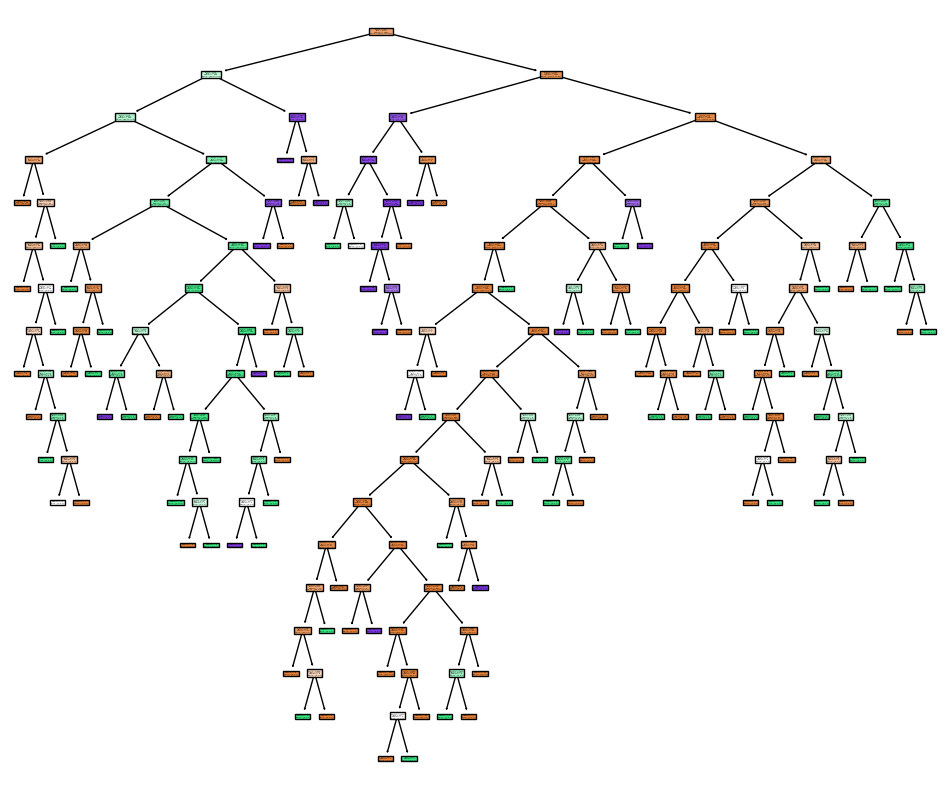

In [16]:
from sklearn import tree
plt.figure(figsize = (12, 10))
tree.plot_tree(classifier, filled = True)

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score,classification_report

print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9101654846335697
              precision    recall  f1-score   support

         1.0       0.95      0.94      0.95       332
         2.0       0.71      0.76      0.73        63
         3.0       0.89      0.89      0.89        28

    accuracy                           0.91       423
   macro avg       0.85      0.86      0.86       423
weighted avg       0.91      0.91      0.91       423



In [19]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[3, 4, 5, 6, 8, 10],
  'max_features':['sqrt', 'log2', 'auto']
}

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
grid = GridSearchCV(classifier, param_grid=parameter, cv = 5, scoring = "accuracy")

In [22]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 8, 10],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [23]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 10,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [24]:
grid.best_score_

0.9189349112426035

In [25]:
y_pred_grid = grid.predict(X_test)

In [26]:
print(accuracy_score(y_pred_grid, y_test))
print(classification_report(y_pred_grid, y_test))

0.8841607565011821
              precision    recall  f1-score   support

         1.0       0.97      0.92      0.94       344
         2.0       0.57      0.68      0.62        57
         3.0       0.68      0.86      0.76        22

    accuracy                           0.88       423
   macro avg       0.74      0.82      0.78       423
weighted avg       0.90      0.88      0.89       423

